1. 버거지수를 활용한 지역별 발전정도 확인
2. 한 도시의 발전 수준은 '(버거킹수 + 맥도날드수 + KFC수)/롯데리아수'로 계산
3. 높게 나올 수록 더 많이 발전된 도시

In [67]:
# 초기 다운 라이브러리
!pip install koreanize-matplotlib   # 한글폰트 지원도구
!pip install seaborn                # 데이터 시각화

import pandas as pd
import seaborn as sns 
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob               # 여러개의 파일을 쉽게 불러오기 위한 도구

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [68]:
# 반복문을 사용하여 전체 파일 업로드
file_names = glob("*.csv")          
df_list = []
for file_path in file_names:
    df_temp = pd.read_csv(file_path, low_memory=False)     # False -> 데이터 타입이 섞여 있는 경우 경고
    df_list.append(df_temp)

In [69]:
# concat을 통해 하나의 데이터 프레임으로 합치기
df = pd.concat(df_list)  

In [70]:
# 전처리
df = df[{'상호명', '상권업종대분류명', '시도명', '시군구명', '도로명주소', '경도', '위도'}].copy()  # 필요한 컬럼 남기기
df = df[df["상호명"].notnull()].copy()                                                 

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_12688\1143960995.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[{'상호명', '상권업종대분류명', '시도명', '시군구명', '도로명주소', '경도', '위도'}].copy()  # 필요한 컬럼 남기기


In [71]:
# 상호명이 없는 데이터 제거
df = df[df["상호명"].notnull()].copy()

In [72]:
# 상호명을 대문자로 변경
df["상호명_대문자"] = df["상호명"].str.upper()

In [73]:
# BMKL(버거킹,맥도날드,KFC,롯데리아) 추출
burger = ["버거킹", "맥도날드", "KFC", "롯데리아"]
df = df[df["상호명_대문자"].str.contains("버거킹|Burger|맥도날드|멕도날드|롯데리아|KFC|케이에프씨")]

In [74]:
# 전처리를 위한 유일값 확인
df["상호명"].unique()

array(['버거킹', '롯데리아', '케이에프씨원주단계', '맥도날드', 'KFC원주단계DT점', '케이에프씨춘천석사',
       'KFC', '롯데리아문막휴게소강릉방면', 'BKR버거킹', '문막휴게소롯데리아', '맥도날드동해DT점',
       'KFC춘천이마트점', '버거킹춘천거두GS점', '케이에프씨춘천이마트', '한국맥도날드춘천후평DT점춘천후평DT점',
       '롯데리아고성간성점', '에스알에스KFC현대성우', '롯데리아익스프레스점', '한국맥도날드강릉올림픽파크레스토랑점',
       '롯데리아혁신도시점', '에이치케이라온롯데리아롯데마트', '신맥맥도날드원주', '롯데리아원주일산점',
       '문막휴게소강릉방향롯데리아', '한국맥도날드춘천후평DT점', '한국맥도날드원주단계DT', '한국맥도날드춘천퇴계DT점',
       '버거킹오션월드', '하나로마트롯데리아', '맥도날드이천점', '롯데리아여주휴게소인천방면', '용인보정KFC',
       '맥도날드마석점', '버거킹여주휴게소강릉방면', 'KFC서현역점', '롯데리아산본중앙', '용인상현KFC',
       '맥도날드수원세류DT점', 'KFC정자역점정자역점', 'KFC야탑역점', '맥도날드이천아미점', '롯데리아호원점',
       'KFC용인명지DT점', '롯데리아수원연무점', '버거킹평택서정점', 'SRSKFC수원역사', 'SRSKFC부천역',
       'SRSKFC분당월드쇼핑', 'SRSKFC', '롯데리아경기대역점', 'SRSKFC서현역', 'SRSKFC영통시네마',
       '롯데리아일산가좌점', '세이브존롯데리아', 'KFC이천터미널', '맥도날드고양원당DT점', '대민롯데리아',
       '맥도날드용인동백DT점', '롯데리아화성봉담점', '롯데리아가평현리점', '롯데리아오산세교디티',
       '한국맥도날드화성봉담DT점', 'KFC하남홈플러스점', '롯데리아자유로휴게소점', '버거킹동두천DT',
       'KFC용인보정점', 'KFC오산DT점

In [75]:
# 브랜드 파생변수 만들기/예외처리
for bname in burger:
    df.loc[df["상호명_대문자"].str.contains(bname),"브랜드"] = bname

df.loc[df["상호명_대문자"].str.contains("케이에프씨"),"브랜드"] = "KFC"
df.loc[df["상호명_대문자"].str.contains("멕도날드"),"브랜드"] = "맥도날드"

In [76]:
df[["상호명", "브랜드"]]

,상권업종대분류명,상호명,도로명주소,경도,위도,시도명,시군구명,상호명_대문자,브랜드
2699,음식,버거킹,"강원도 홍천군 서면 한치골길 262, (팔봉리)",127.687273,37.652324,강원도,홍천군,버거킹,버거킹
3162,음식,롯데리아,"강원도 원주시 지정면 오크밸리2길 58, (월송리)",127.808946,37.407858,강원도,원주시,롯데리아,롯데리아
6156,음식,케이에프씨원주단계,"강원도 원주시 북원로 2266, (단계동)",127.934373,37.348017,강원도,원주시,케이에프씨원주단계,KFC
8195,음식,맥도날드,"강원도 속초시 동해대로 4118, (조양동)",128.583904,38.189882,강원도,속초시,맥도날드,맥도날드
8275,음식,맥도날드,"강원도 원주시 서원대로 154, (단계동)",127.928180,37.344175,강원도,원주시,맥도날드,맥도날드
...,...,...,...,...,...,...,...,...,...
72250,음식,롯데리아,"충청북도 충주시 수안보면 주정산로 183, (온천리)",127.975854,36.849507,충청북도,충주시,롯데리아,롯데리아
73850,음식,롯데리아,"충청북도 청주시 서원구 내수동로 116, (사창동)",127.460250,36.633746,충청북도,청주시,롯데리아,롯데리아
74844,음식,롯데리아,"충청북도 제천시 풍양로13길 5, (중앙로1가)",128.210943,37.137848,충청북도,제천시,롯데리아,롯데리아
78041,음식,버거킹,"충청북도 음성군 맹동면 대하2가길 11, (두성리)",127.542769,36.907964,충청북도,음성군,버거킹,버거킹


<AxesSubplot: >

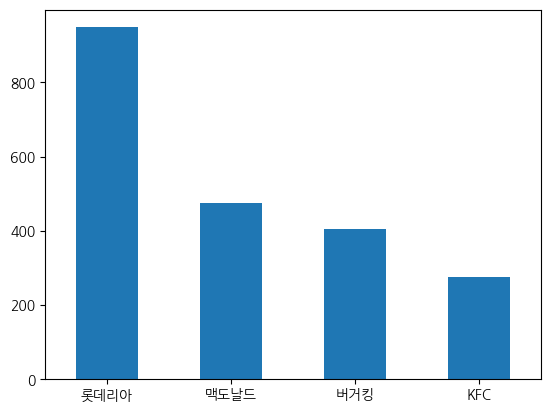

In [77]:
# 표만들기
df["브랜드"].value_counts().plot.bar(rot=0)

In [78]:
# 전국 시도별 상호수와 버거지수
df_skorea = df.groupby(["시도명","브랜드"])["상호명"].count().unstack().fillna(0).astype(int)
df_skorea["합계"] = df_skorea.sum(axis=1)
df_skorea

브랜드,KFC,롯데리아,맥도날드,버거킹,합계
시도명,,,,,
강원도,10,39,11,11,71
경기도,78,231,103,97,509
경상남도,7,64,33,22,126
경상북도,9,48,16,22,95
광주광역시,9,34,14,10,67
대구광역시,13,44,30,19,106
대전광역시,10,40,17,19,86
부산광역시,13,51,55,21,140
서울특별시,94,128,100,117,439


In [79]:
# 버거지수
df_skorea["버거지수"] = (df_skorea["KFC"] + df_skorea["버거킹"] + df_skorea["맥도날드"]) / df_skorea["롯데리아"]
df_skorea

브랜드,KFC,롯데리아,맥도날드,버거킹,합계,버거지수
시도명,,,,,,
강원도,10,39,11,11,71,0.820513
경기도,78,231,103,97,509,1.203463
경상남도,7,64,33,22,126,0.968750
경상북도,9,48,16,22,95,0.979167
광주광역시,9,34,14,10,67,0.970588
대구광역시,13,44,30,19,106,1.409091
대전광역시,10,40,17,19,86,1.150000
부산광역시,13,51,55,21,140,1.745098
서울특별시,94,128,100,117,439,2.429688
